In [12]:
#init

import librosa
import os
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

dataset_folder_path = './Medley-Solos-DB/Dataset'
metadata_file_path = './Medley-Solos-DB/Metadata/Medley-solos-DB_metadata.csv'

Number of samples per instrument class:

0. clarinet: 109
1. distorted electric guitar: 189
2. female singer: 138
3. flute: 168
4. piano: 674
5. tenor saxophone: 40
6. trumpet: 53
7. violin: 629
2000
2000
760cacf6-ceb4-5d2a-fcad-319d3b58ad8c
[[ -5.1434226 -10.427603  -18.22559   ... -11.399288   -8.378765
   -7.6772475]
 [ -4.35624   -10.040933  -23.49536   ...  -5.4670644  -5.432519
   -4.2545314]
 [ -1.7189434  -4.64816    -6.602396  ...   8.192667    5.896209
    3.6361914]
 ...
 [-45.186047  -51.120483  -65.57784   ... -65.57784   -46.268837
  -40.283817 ]
 [-46.793114  -52.648514  -65.57784   ... -65.57784   -46.116276
  -40.156113 ]
 [-52.858753  -58.727192  -65.57784   ... -65.57784   -47.25538
  -41.238712 ]]


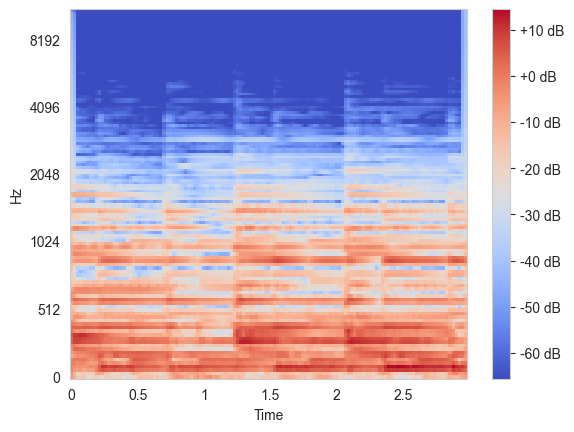

Medley-solos-DB_training-4_760cacf6-ceb4-5d2a-fcad-319d3b58ad8c.wav


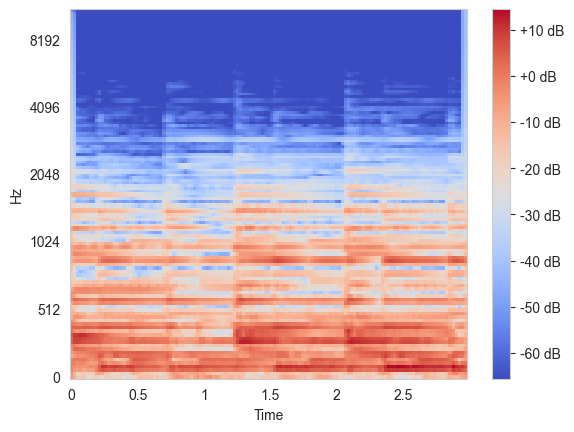

,subset,instrument,instrument_id,song_id,uuid4,filename,mel_spectrogram
0,training,violin,7,198,b684ed2e-5d19-5fa1-f0e4-5e930346cf94,Medley-solos-DB_training-7_b684ed2e-5d19-5fa1-...,"[[-31.329947, -37.24196, -60.041595, -59.42111..."
1,training,female singer,2,155,cc907408-4c73-5c9f-f5ed-5b2933ee2a6b,Medley-solos-DB_training-2_cc907408-4c73-5c9f-...,"[[-14.382023, -17.703276, -24.051867, -24.3264..."
2,training,clarinet,0,140,c5cfb190-da8c-52f4-f99a-7df71d2c61b4,Medley-solos-DB_training-0_c5cfb190-da8c-52f4-...,"[[-22.480629, -18.24737, -18.483614, -18.19679..."
3,training,piano,4,176,760cacf6-ceb4-5d2a-fcad-319d3b58ad8c,Medley-solos-DB_training-4_760cacf6-ceb4-5d2a-...,"[[-5.1434226, -10.427603, -18.22559, -17.05284..."
4,training,piano,4,183,5d5c5a9a-a80b-5049-f7bb-758740663984,Medley-solos-DB_training-4_5d5c5a9a-a80b-5049-...,"[[-28.104416, -27.824883, -31.07262, -29.16502..."
...,...,...,...,...,...,...,...
1995,validation,female singer,2,208,83025a8b-187f-5918-f910-9091fa58a15d,Medley-solos-DB_validation-2_83025a8b-187f-591...,"[[-38.459244, -45.14545, -51.93462, -49.375786..."
1996,validation,piano,4,219,f94fb1c6-530e-5d06-f70d-d6704a03ff42,Medley-solos-DB_validation-4_f94fb1c6-530e-5d0...,"[[-29.736235, -35.40044, -63.51885, -59.875183..."
1997,validation,piano,4,214,5f137982-1c08-5ac9-f400-bde900d978a8,Medley-solos-DB_validation-4_5f137982-1c08-5ac...,"[[-16.54209, -22.93165, -30.80209, -27.741816,..."
1998,validation,distorted electric guitar,1,202,dfbe2293-1071-59e0-ff2b-5a506185645b,Medley-solos-DB_validation-1_dfbe2293-1071-59e...,"[[-62.215424, -62.215424, -62.215424, -62.2154..."


In [13]:
#extract necessary data

def extract_mel_spectrogram(file_path):
    y, sr = librosa.load(file_path, mono=True, sr=22050)
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram)
    return spectrogram_db

def filter_out_metadata_files(file_list): #filters out metadata files used in macOS
    filtered_files = [file for file in file_list if not file.startswith('._')]
    return filtered_files

def extract_uuid_from_filename(filename):
    base = os.path.splitext(filename)[0] #split file name into the name and extention and get just the filename
    uuid = base.split("_")[-1] #split the text into couple of texts divided by underscore "_" and get the last part ([-1] index tells python to get the last part of the array)
    return uuid

def get_metadata_for_file(filename, metadata_df): #df means pandas dataframe
    uuid = extract_uuid_from_filename(filename)
    row = metadata_df[metadata_df['uuid4'] == uuid] #get row of the dataframe in which the uuid column is equal to uuid from the given filename
    return row

def miniaturize_dataset(file_list):
    random.seed(42)

    train_files = [f for f in file_list if "training" in f.lower()] #get files that have "train" in the name
    test_files = [f for f in file_list if "test" in f.lower()]
    val_files =  [f for f in file_list if "validation" in f.lower()]

    train_sample = random.sample(train_files, 1000) #get 100 random files from the subset that has "train" in the name
    test_sample = random.sample(test_files, 500)
    val_sample = random.sample(val_files, 500)

    return train_sample + test_sample + val_sample #combine all samples


metadata = pd.read_csv(metadata_file_path)

audio_files = os.listdir(dataset_folder_path)
audio_files = filter_out_metadata_files(audio_files)
audio_files = miniaturize_dataset(audio_files)

####
combined_data = []

for file in audio_files:
    uuid = extract_uuid_from_filename(file)
    row = get_metadata_for_file(file, metadata)

    if row.empty:
        continue

    spectrogram = extract_mel_spectrogram(os.path.join(dataset_folder_path,file))

    combined_data.append({
        "subset": row["subset"].item(),
        "instrument": row["instrument"].item(),
        "instrument_id": row["instrument_id"].item(),
        "song_id": row["song_id"].item(),
        "uuid4": row["uuid4"].item(),
        "filename": file,
        "mel_spectrogram": spectrogram
    })

combined_data_df = pd.DataFrame(combined_data)
####

def count_samples_per_class(df):
    # Hardcoded list of all instrument classes (in your defined order)
    class_labels = [
        "clarinet",
        "distorted electric guitar",
        "female singer",
        "flute",
        "piano",
        "tenor saxophone",
        "trumpet",
        "violin"
    ]

    print("Number of samples per instrument class:\n")
    for i, label in enumerate(class_labels):
        count = (df["instrument"] == label).sum()
        print(f"{i}. {label}: {count}")

    # Optionally return a dict for later use (e.g., plotting)
    return {label: (df["instrument"] == label).sum() for label in class_labels}

# Usage:
class_counts = count_samples_per_class(combined_data_df)

print(len(audio_files))
print(len(combined_data_df))

fig,ax = plt.subplots()
example_spectrogram = combined_data_df.loc[3,"mel_spectrogram"] #use .loc to access objects in a dataframe
print(combined_data_df.loc[3,"uuid4"])
print(example_spectrogram)
img = librosa.display.specshow(example_spectrogram, sr=22050, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

#Exctract the spectrogram from the file to make sure the spectrogram is assigned to the right row
fig,ax = plt.subplots()
example_spectrogram = extract_mel_spectrogram(os.path.join(dataset_folder_path,combined_data_df.loc[3,"filename"]))
print(combined_data_df.loc[3,"filename"])
img = librosa.display.specshow(example_spectrogram, sr=22050, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

combined_data_df

In [14]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#preprocess data for CNN


#normalize the spectrogram values to be between 0 and 1
#combined_data_df["mel_spectrogram"] = [spec / np.max(spec) for spec in combined_data_df["mel_spectrogram"]] #normalize values in spectrogram by dividing every value within an array by the highest value found in that array
combined_data_df["mel_spectrogram"] = [
    (spec - spec.min()) / (spec.max() - spec.min()) for spec in combined_data_df["mel_spectrogram"]
]
encoder = LabelEncoder()
def split_by_label(combined_data_df):

    encoder.fit(combined_data_df["instrument"].values)
    # Boolean masks
    train_mask = combined_data_df["subset"] == "training"
    val_mask = combined_data_df["subset"] == "validation"
    test_mask = combined_data_df["subset"] == "test"

    # Training set
    X_train = np.stack(combined_data_df.loc[train_mask, "mel_spectrogram"].values)
    X_train = X_train[..., np.newaxis]
    y_train = combined_data_df.loc[train_mask, "instrument"].values

    y_train = encoder.transform(y_train)
    y_train = to_categorical(y_train)

    # Validation set
    X_val = np.stack(combined_data_df.loc[val_mask, "mel_spectrogram"].values)
    X_val = X_val[..., np.newaxis]
    y_val = combined_data_df.loc[val_mask, "instrument"].values
    y_val = encoder.transform(y_val)  # use same encoder as training
    y_val = to_categorical(y_val)

    # Test set
    X_test = np.stack(combined_data_df.loc[test_mask, "mel_spectrogram"].values)
    X_test = X_test[..., np.newaxis]
    y_test = combined_data_df.loc[test_mask, "instrument"].values
    y_test = encoder.transform(y_test)  # same encoder
    y_test = to_categorical(y_test)

    return X_train, y_train, X_val, y_val, X_test, y_test

def split_random(combined_data_df):
    X = np.stack(combined_data_df["mel_spectrogram"].values) #stack the array of 2d spectrograms into a 3d array
    y = combined_data_df["instrument"].values # create a list of all possible instrument labels

    y_encoded = encoder.fit_transform(y) # get list of all possible values (fit) and transform all unique labels into integers
    y_onehot = to_categorical(y_encoded) # transform integers into one-hot vectors example: 2 -> [0,0,1,0]

    X = X[..., np.newaxis] # add a new axis to make the data 4D to work with conv2d. Each spectrogram is going to be interpreted as a monochrome image.

    # Split into training + temp (temp will later become validation + test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y_onehot, test_size=0.5, random_state=42, stratify=y_onehot #straitify preserves class proportions so if there is 80% one class and 20% other class each of the split sets will have the same ratio of these classes
    )

    # Split temp into validation and test (50% each of temp -> 15% each of total)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    return X_train, y_train, X_val, y_val, X_test, y_test

#when i split the data set by the subsets defined in the metadata the accuracy is much worse it goes from over 90% to less than 70%
#the loss goes from 0.3 to over 2.5!!!
#X_train, y_train, X_val, y_val, X_test, y_test = split_random(combined_data_df)
X_train, y_train, X_val, y_val, X_test, y_test = split_by_label(combined_data_df)

print(f"Train: {len(X_train)} , {len(y_train)}, Validation: {len(X_val)}, {len(y_val)}, Test: {len(X_test)}, {len(y_test)}")

num_classes = combined_data_df["instrument"].nunique() # nunique counts the number of unique labels in the instrument column

model = models.Sequential([
    # First block
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:], kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Second block
    layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    # Third block
    layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Fourth block (optional deeper feature extraction)
    layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),  # replaces flatten
    layers.Dropout(0.5),

    # Fully connected layer
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

model.save("sound_classifier_model.keras")

Train: 1000 , 1000, Validation: 500, 500, Test: 500, 500


D:\PROJEKTY_PYCHARM\DemoAudioClassifier\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 128, 129, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128, 129, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 128, 129, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128, 129, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,243,368 (4.74 MB)

 Trainable params: 1,241,448 (4.74 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6480 - loss: 1.4130 - val_accuracy: 0.4040 - val_loss: 2.5579
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7850 - loss: 0.8808 - val_accuracy: 0.2680 - val_loss: 3.6150
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8320 - loss: 0.7358 - val_accuracy: 0.0620 - val_loss: 11.9536
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8530 - loss: 0.6617 - val_accuracy: 0.4100 - val_loss: 3.6326
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8840 - loss: 0.5421 - val_accuracy: 0.1700 - val_loss: 10.7331
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9210 - loss: 0.4731 - val_accuracy: 0.1340 - val_loss: 8.9419
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9400 - loss: 0.4001 - val_accuracy: 0.4120 - val_loss: 9.1783
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9520 - loss: 0.3785 - val_accuracy: 0.2840 - val_los

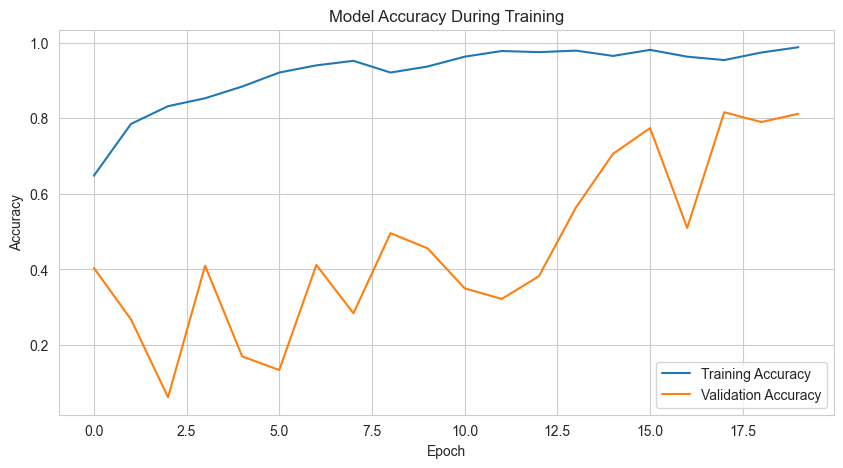

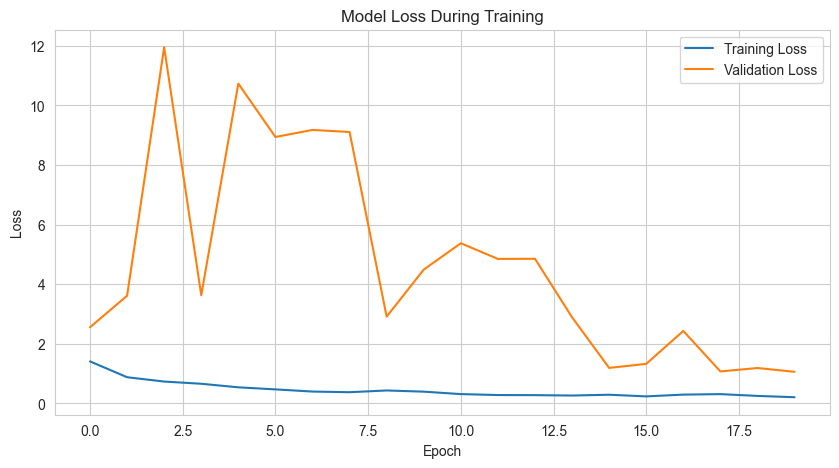

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step
Evaluation Metrics:
Accuracy:    0.6840
Sensitivity: 0.5983
Precision:   0.5699
F1-Score:    0.5287


D:\PROJEKTY_PYCHARM\DemoAudioClassifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


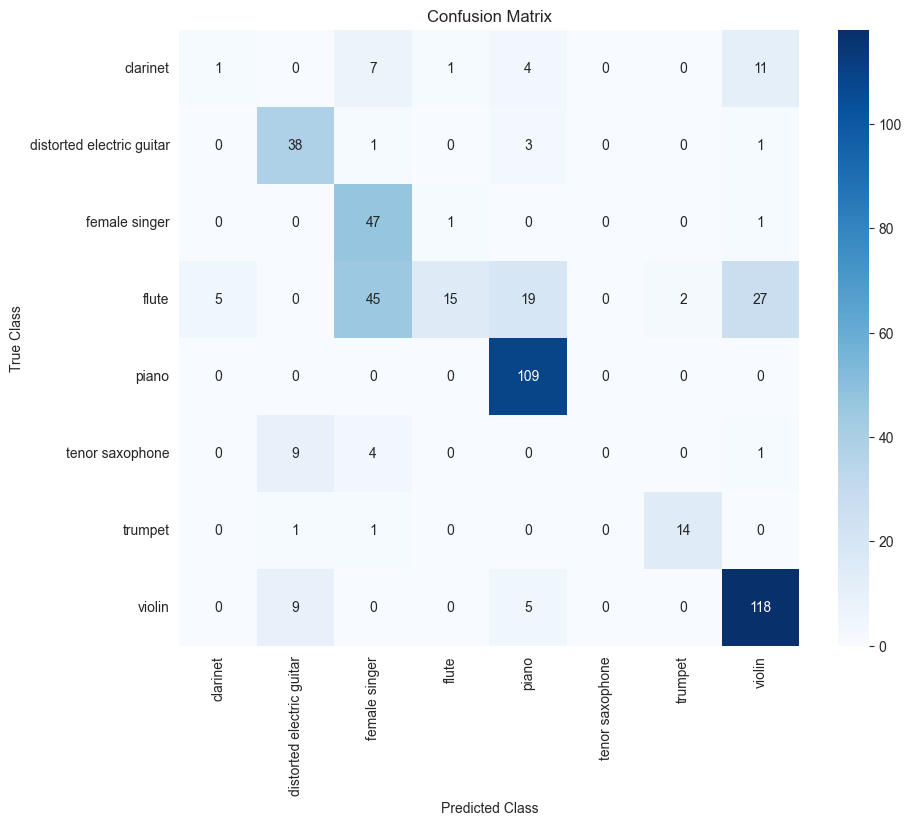

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Get predictions
y_pred = model.predict(X_test) # returns an array for each sample in the training set it returns an array that's the size of the amount of possible classes with a probability of each class.
y_pred_classes = np.argmax(y_pred, axis=1)  # predicted class indices (argmax finds the index of the column with the highest amount in each row, that's what the axis=1 is for)
y_true_classes = np.argmax(y_test, axis=1)  # true class indices (argmax finds the "1" in each row since it's a one-hot encoded array also what axis=1 is for (the rows))

# Compute metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes) #Accuracy= Number of Correct Predictions / Total Samples
precision = precision_score(y_true_classes, y_pred_classes, average='macro') # Precision is calculated for each class separately and then the mean is taken from all of them where each class has the same weight.
# For a single class TP = correctly guessed current class, FP = Guessed current class when it wasn't actually it, TN = Guessed another class when it actually was another class, FN = guessed another class when it was actually the current class. This applies also to sensitivity (recall = sensitivity)
# may return an error when TP + FP = 0
recall = recall_score(y_true_classes, y_pred_classes, average='macro')  # sensitivity
f1 = f1_score(y_true_classes, y_pred_classes, average='macro') # F-Score is too complicated for a comment read here: https://en.wikipedia.org/wiki/F-score

print("Evaluation Metrics:")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Sensitivity: {recall:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"F1-Score:    {f1:.4f}")

cm = confusion_matrix(y_true_classes, y_pred_classes)
class_names = [
    "clarinet",
    "distorted electric guitar",
    "female singer",
    "flute",
    "piano",
    "tenor saxophone",
    "trumpet",
    "violin"
]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from tensorflow import keras
model = keras.models.load_model("sound_classifier_model.keras")
print(model.input_shape)

import numpy as np
import librosa

def preprocess_audio(file_path, n_mels=128, duration=3.0, sr=22050):
    # Load audio, shorten to duration
    y, sr = librosa.load(file_path, mono=True, sr=sr, duration=duration)

    # Compute Mel-spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Normalize to 0-1
    spectrogram = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())

    # Add channel dimension at the end and batch dimension at the front
    spectrogram = np.expand_dims(spectrogram, axis=-1)  # (height, width, 1)
    spectrogram = np.expand_dims(spectrogram, axis=0)   # (1, height, width, 1)

    return spectrogram

# Example usage:
file_path = "example_sound.wav"
audio_data = preprocess_audio(file_path)

# Predict
predictions = model.predict(audio_data)
predicted_class = np.argmax(predictions)
print("Predicted class index:", predicted_class)
predicted_label = encoder.inverse_transform([predicted_class])[0]
print("Predicted label:", predicted_label)

(None, 128, 129, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Predicted class index: 6
Predicted label: trumpet
